<h1> Churn Prediction on Telecom Dataset Using Logistic Regresion and Decision Trees Algorithms

.

<h1> Table of Content

1. [Introduction](#introduction)
2. [Imprting Libraries](#importing-the-libraries)
3. [Exploratory Data Analysis](#exploratory-data-analysis-eda--feature-selection)  
4. [Encoding and Feature Scaling](#encoding-and-feature-scaling)
5. [Treating the Imbalanced Data](#treating-the-imbalance-data)
6. [Model Building and Model Selection](#model-building-and-model-selection)
7. [Conclusion](#conclusion)

# Introduction

This notebook focuses on developing a machine learning model in Python to predict customer churn (i.e., whether a customer will leave the company). Both Logistic Regression and Logistic Regression are implemented and compared..

**Dataset:** [Telco Customer Churn: IBM Dataset](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset)

**Modules and Steps:**
1. pandas - For data manipulation and exploratory data analysis (EDA), including one-hot encoding of categorical variables.
2. matplotlib & seaborn - For data visualization.
3. MinMaxScaler - To scale continuous features.
4. sklearn's resample - To address imbalance in the target variable using upsampling techniques.
5. sklearn's LogisticRegression & DecisionTreeClassifier - For training the models.
6. sklearn's metrics - To create confusion matrices.


Other essentials: sklearn's recall and precision score, and train_test_split.

**Column Descriptions:**

For detailed descriptions of the columns, please refer to [this link](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset). Including all column descriptions here would make the introduction excessively long and could be skipped by readers.


# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

# Looking at the dataset

In [4]:
# Load the dataset
churn_df = pd.read_excel("Telco_customer_churn.xlsx")

In [5]:
churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Exploratory Data Analysis (EDA) & Feature Selection

In [6]:
# Shape of the dataset
churn_df.shape

(7043, 33)

In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
# Check for null
churn_df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

**We can exclude the "Churn reason" column from the predictive analysis. Additionally, "Churn Value" and "Churn Label" provide the same information, differing only in their data type, with "Churn Value" being numeric (0 or 1) and "Churn Label" being categorical (Yes or No).**

In [9]:
#Drop Churn Reason and Churn Label cols
churn_df.drop("Churn Reason", inplace = True, axis = 1)
churn_df.drop("Churn Label", inplace = True, axis = 1)

In [10]:
# Lets explore our target variable "Churn Label"
churn_df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Churn Value')

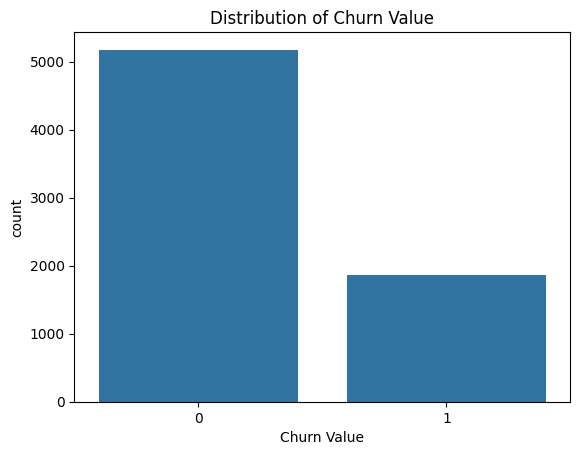

In [11]:
sns.countplot(x = "Churn Value", data = churn_df)
plt.title("Distribution of Churn Value")

**We observe a notable imbalance in the dataset. However, before addressing this issue, let's delve into our explanatory variables.**

First, let's examine the categorical columns:

In [12]:
# Create list of catagorical cols
Cat_cols = []

for col in churn_df.columns:
    if churn_df[col].dtype == "object":
        Cat_cols.append(col)

print("We have {} catagorical columns:".format(len(Cat_cols)))
Cat_cols

We have 22 catagorical columns:


['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges']

**Lets find out the number of binary cols**

In [13]:
# Lets find out the number of binary variables
binary_cols = []

for col in churn_df.columns:
    if churn_df[col].value_counts().shape[0] ==2:
        binary_cols.append(col)

print("We have {} binary columns:".format(len(binary_cols)))
binary_cols

We have 7 binary columns:


['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Paperless Billing',
 'Churn Value']

Lets examine distribution of these variables:

<Axes: xlabel='Phone Service', ylabel='count'>

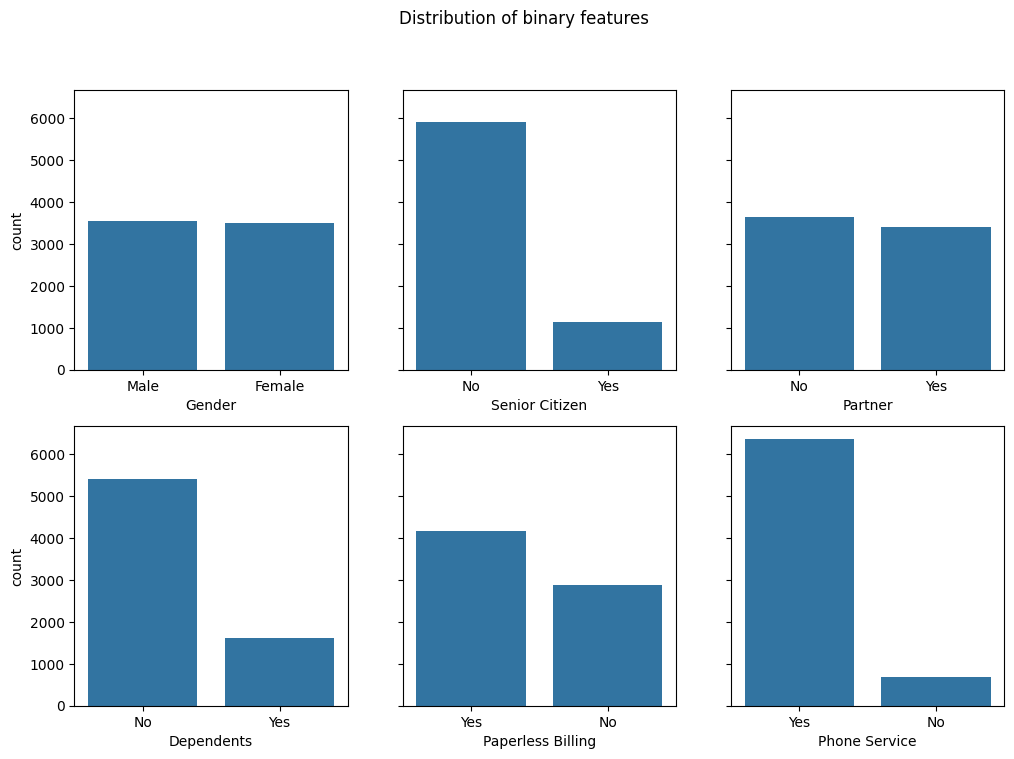

In [14]:
fig, axes = plt.subplots(2,3, figsize = (12,8), sharey = True)
plt.suptitle("Distribution of binary features")
sns.countplot(x = "Gender", data = churn_df, ax=axes[0,0])
sns.countplot(x = "Senior Citizen", data = churn_df, ax=axes[0,1])
sns.countplot(x = "Partner", data = churn_df, ax=axes[0,2])
sns.countplot(x = "Dependents", data = churn_df, ax=axes[1,0])
sns.countplot(x = "Paperless Billing", data = churn_df, ax=axes[1,1])
sns.countplot(x = "Phone Service", data = churn_df, ax=axes[1,2])

#### Notable Imbalances Observed:

* **Senior Citizen** - The majority of customers are under 65 years old.
* **Dependents** - Most customers do not live with dependents (children, parents, etc.).
* **Phone Service** - The majority of customers utilize phone services.


#### Lets explore how these variables affect the average churn rate

In [15]:
churn_df[['Gender', 'Churn Value']].groupby(['Gender']).mean()

,Churn Value
Gender,
Female,0.269209
Male,0.261603


In [16]:
churn_df[['Senior Citizen', 'Churn Value']].groupby('Senior Citizen').mean()

,Churn Value
Senior Citizen,
No,0.236062
Yes,0.416813


In [17]:
churn_df[['Partner', 'Churn Value']].groupby('Partner').mean()

,Churn Value
Partner,
No,0.329580
Yes,0.196649


In [18]:
churn_df[['Dependents', 'Churn Value']].groupby('Dependents').mean()

,Churn Value
Dependents,
No,0.325517
Yes,0.065151


In [19]:
churn_df[['Phone Service', 'Churn Value']].groupby('Phone Service').mean()

,Churn Value
Phone Service,
No,0.249267
Yes,0.267096


In [20]:
churn_df[['Paperless Billing', 'Churn Value']].groupby('Paperless Billing').mean()

,Churn Value
Paperless Billing,
No,0.163301
Yes,0.335651


In [21]:
# Get all non-binary catagorical variables
non_binary_cat_cols = [i for i in Cat_cols if i not in binary_cols ]
non_binary_cat_cols

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Payment Method',
 'Total Charges']


The geographical information captured in the "Country" and "State" columns lacks variability, given that all observations originate from California, U.S. Additionally, the data is spread across 1,129 cities, resulting in an average of 6.5 observations per city.

As a result, we have decided to exclude the geographical columns from our model.

<h3>Inspecting other catagorical variables

<Axes: xlabel='Multiple Lines', ylabel='count'>

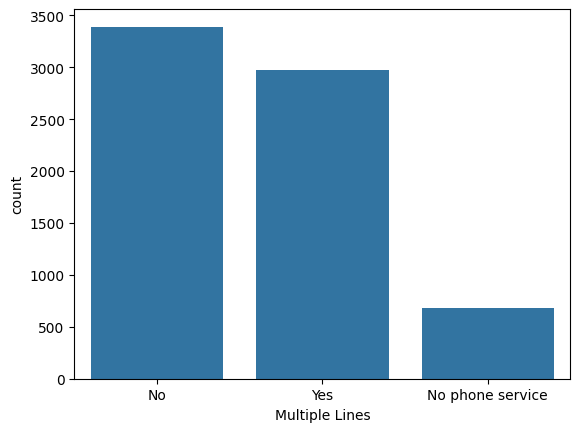

In [22]:
# Examine Multiple lines
sns.countplot(x = "Multiple Lines", data = churn_df)

In [23]:
# Impact on churn value
churn_df[['Multiple Lines', 'Churn Value']].groupby('Multiple Lines').mean().sort_values(by = 'Churn Value', ascending=False)

,Churn Value
Multiple Lines,
Yes,0.286099
No,0.250442
No phone service,0.249267


Customers with multipe lines connection have a higher churn rate.

<Axes: xlabel='Internet Service', ylabel='count'>

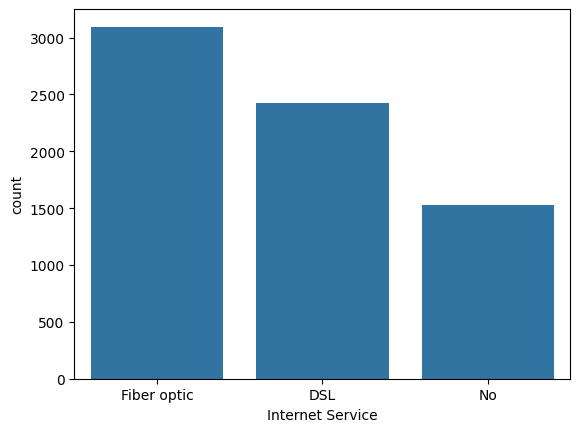

In [24]:
# Examine Internet Services
sns.countplot(x = "Internet Service", data = churn_df,
              order = churn_df['Internet Service'].value_counts().index)

In [25]:
# Impact on churn value
churn_df[['Internet Service', 'Churn Value']].groupby('Internet Service').mean().sort_values(by= 'Churn Value', ascending = False)

,Churn Value
Internet Service,
Fiber optic,0.418928
DSL,0.189591
No,0.074050


People with Fiber Optic have a much higher churn rate. Lets explore the factor behind it

In [26]:
churn_df[['Monthly Charges', 'Internet Service']].groupby('Internet Service').mean().sort_values(by = 'Monthly Charges')

,Monthly Charges
Internet Service,
No,21.079194
DSL,58.102169
Fiber optic,91.500129


The monthly charges for fiber optic connection is much higher than the other two.

### Lets explore the internet related features

<Axes: xlabel='Streaming Movies', ylabel='count'>

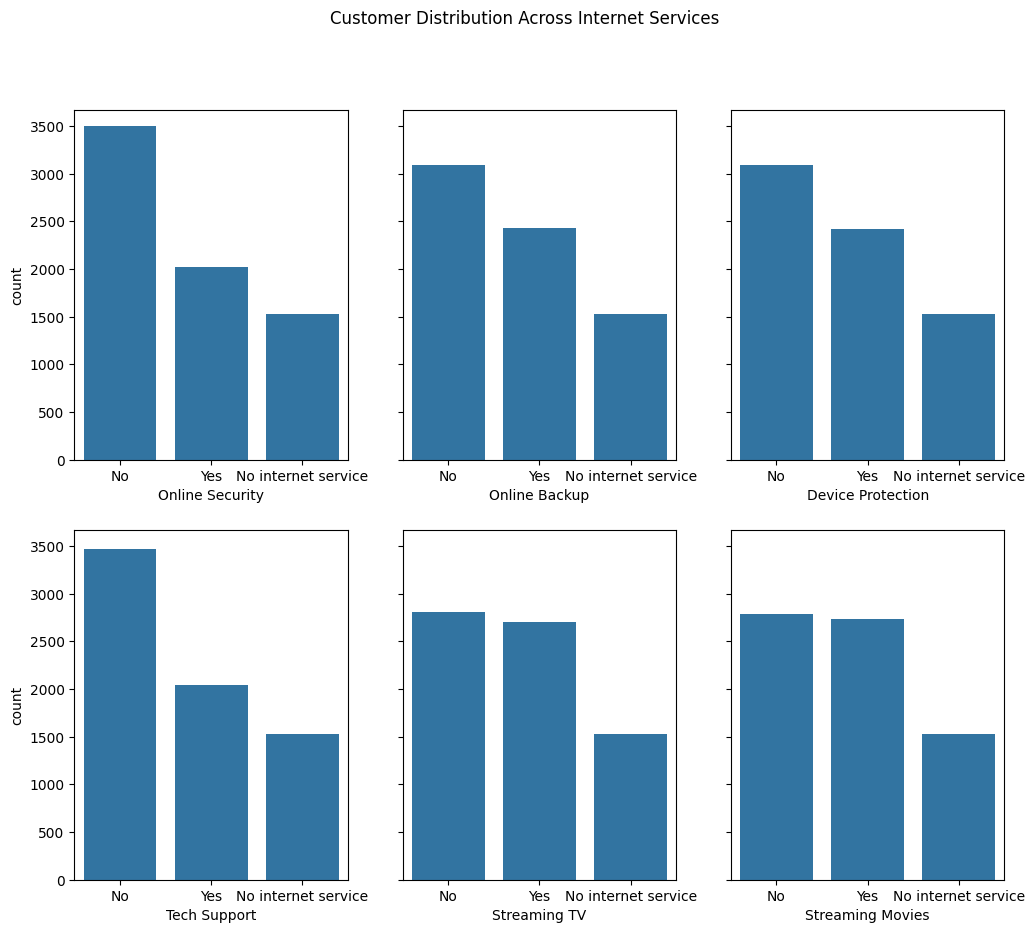

In [27]:
fig, axes = plt.subplots(2,3, figsize = (12,10), sharey = True)
plt.suptitle('Customer Distribution Across Internet Services')
sns.countplot(x='Online Security', data = churn_df, ax=axes[0,0], order = churn_df['Online Security'].value_counts().index)
sns.countplot(x='Online Backup', data = churn_df, ax=axes[0,1], order = churn_df['Online Backup'].value_counts().index)
sns.countplot(x='Device Protection', data = churn_df, ax=axes[0,2], order = churn_df['Device Protection'].value_counts().index)
sns.countplot(x='Tech Support', data = churn_df, ax=axes[1,0], order = churn_df['Tech Support'].value_counts().index)
sns.countplot(x='Streaming TV', data = churn_df, ax=axes[1,1], order = churn_df['Streaming TV'].value_counts().index)
sns.countplot(x='Streaming Movies', data = churn_df, ax=axes[1,2], order = churn_df['Streaming Movies'].value_counts().index)

Though these services are offered for free by the company, most people do not use them. Lets see if these feature impact the churn rate

In [28]:
churn_df[['Online Security', 'Churn Value']].groupby('Online Security').mean().sort_values(by='Online Security')

,Churn Value
Online Security,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [29]:
churn_df[['Device Protection', 'Churn Value']].groupby('Device Protection').mean().sort_values(by='Device Protection')

,Churn Value
Device Protection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [30]:
churn_df[['Online Backup', 'Churn Value']].groupby('Online Backup').mean().sort_values(by='Online Backup')

,Churn Value
Online Backup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [31]:
churn_df[['Tech Support', 'Churn Value']].groupby('Tech Support').mean().sort_values(by='Tech Support')

,Churn Value
Tech Support,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [32]:
churn_df[['Streaming TV', 'Churn Value']].groupby('Streaming TV').mean().sort_values(by='Streaming TV')

,Churn Value
Streaming TV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [33]:
churn_df[['Streaming Movies', 'Churn Value']].groupby('Streaming Movies').mean().sort_values(by='Streaming Movies')

,Churn Value
Streaming Movies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In summary, individuals who abstain from utilizing these online services exhibit a notable tendency to discontinue their subscriptions. Nonetheless, the disparity in subscription termination rates between users and non-users of Streaming TV and Streaming Movies is relatively minimal.

### Exploring Contract and Payment Method

Text(0.5, 1.0, 'Customers by Contract Type')

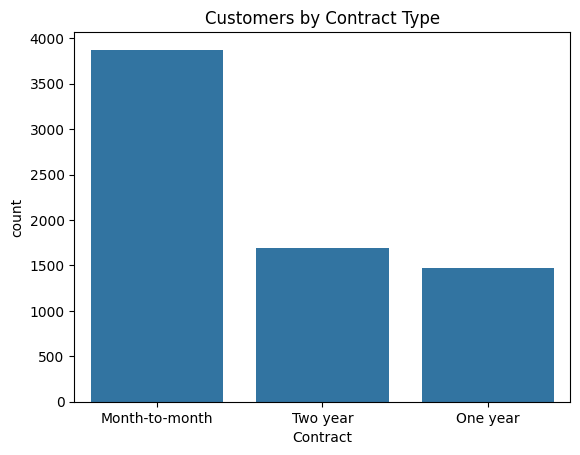

In [34]:
sns.countplot(x = 'Contract', data = churn_df)
plt.title('Customers by Contract Type')

In [35]:
churn_df[['Contract', 'Churn Value']].groupby('Contract').mean()

,Churn Value
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


No surprises here - Customers with shorter contract tend to churn more

Text(0.5, 1.0, 'Customers by Contract Type')

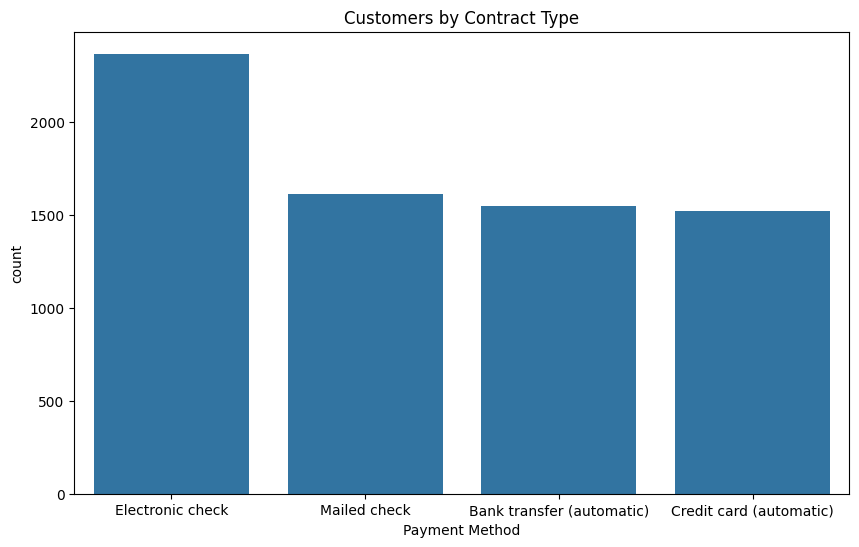

In [36]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Payment Method', data = churn_df, order = churn_df['Payment Method'].value_counts().index)
plt.title('Customers by Contract Type')

In [37]:
churn_df[['Payment Method', 'Churn Value']].groupby('Payment Method').mean().sort_values(by = 'Churn Value')

,Churn Value
Payment Method,
Credit card (automatic),0.152431
Bank transfer (automatic),0.167098
Mailed check,0.191067
Electronic check,0.452854


Here's something worth noting: Customers who use electronic checks are more likely to leave, and this payment method is used most often by customers.

### Exploring Continuous Feature

In [38]:
num_cols = []

for col in churn_df.columns:
    if churn_df[col].dtype.kind in 'iufc':
        num_cols.append(col)
num_cols

['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

**We have three numbers to look at:**

**Tenure Month** - How long a customer has been with us

**Monthly Charges**

**CLTV** - Customer Lifetime Value
Note: We don't need to think about Total Charges because it's just Tenure times Monthly Charges.

Text(0.5, 1.0, 'Tenure vs Churn Value')

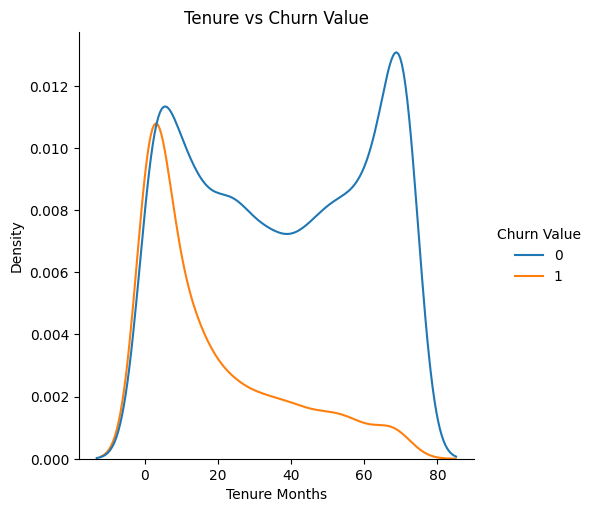

In [39]:
# Explporing Tenure
sns.displot(data = churn_df, x = "Tenure Months", hue = "Churn Value", kind = "kde")
plt.title('Tenure vs Churn Value')

**Customers with lower tenure tend to churn more and vice-versa.**

Text(0.5, 1.0, 'Monthly Charges vs Churn Value')

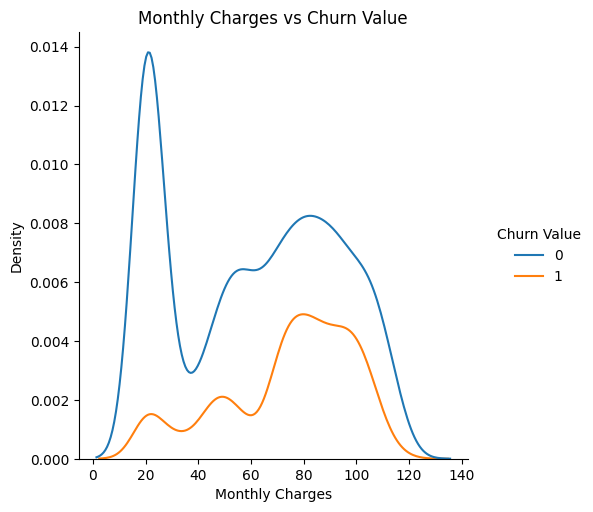

In [40]:
# Exploring Monthly Charges
sns.displot(data = churn_df, x= 'Monthly Charges', hue = 'Churn Value', kind = "kde")
plt.title('Monthly Charges vs Churn Value')

**As the monthly charges go up customers tend to churn more.**

In [41]:
churn_df[['Monthly Charges', 'Churn Value', 'Tenure Months']].groupby('Churn Value').mean()

,Monthly Charges,Tenure Months
Churn Value,,
0,61.265124,37.569965
1,74.441332,17.979133


Average monthly charges for churned customers is about 13 dollars higher and churned customers tend to leave the company about 20 months earlier than the not churned ones.

Text(0.5, 1.0, 'CLTV vs Churn Value')

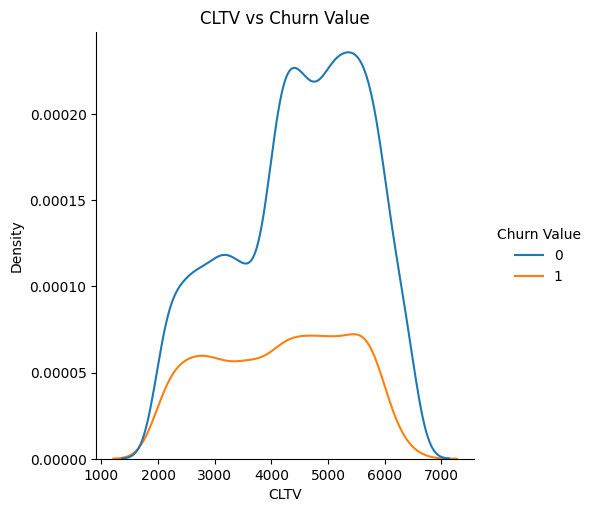

In [42]:
# Explore CLTV
sns.displot(data=churn_df, x='CLTV', hue='Churn Value', kind='kde')
plt.title('CLTV vs Churn Value')

In [43]:
churn_df[['CLTV', 'Churn Value']].groupby('Churn Value').mean()

,CLTV
Churn Value,
0,4490.921337
1,4149.414660


In [44]:
churn_df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score',
       'CLTV'],
      dtype='object')

From the EDA, I have further decided to drop finally I would drop:
1. First 9 cols
2. Gender
3. Total Charges

In [45]:
# Filter features
filtered_df = churn_df.iloc[:, 9:]
filtered_df.drop(['Gender','Total Charges'], inplace = True, axis=1)

In [46]:
# Extract catagorical features from selected features
cat_features = [i for i in filtered_df.columns if filtered_df[i].dtype == 'object']
cat_features

['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

# Encoding and Feature Scaling

## One-hot encoding the catagorical features

In [47]:
# Encode cat_features
encoded_df = pd.get_dummies(filtered_df, columns = cat_features, drop_first = True)

## Scaling the continous features


In [48]:
# MinMax scaling of continous features
scaler = MinMaxScaler()
temp_1 = scaler.fit_transform(filtered_df[["Tenure Months"]])
temp_2 = scaler.fit_transform(filtered_df[["Monthly Charges"]])
temp_3 = scaler.fit_transform(filtered_df[['CLTV']])

In [49]:
# Replacing the original cols with scaled ones
encoded_df['Tenure Months'] = temp_1
encoded_df['Monthly Charges'] = temp_2
encoded_df['CLTV'] = temp_3

# Treating the Imbalance Data

Trating the imbalance data using upsampling technique

Text(0.5, 1.0, 'Distribution of Target Before Upsampling')

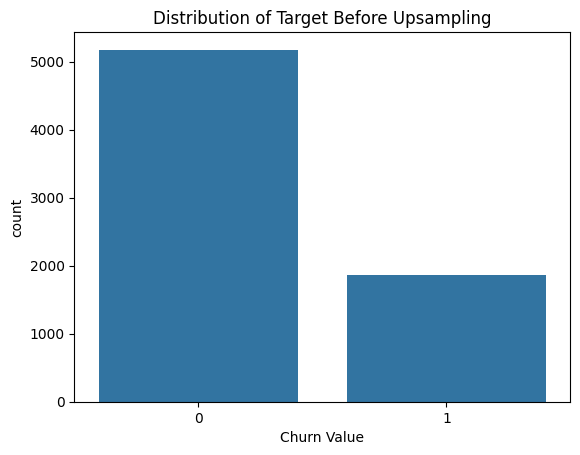

In [50]:
sns.countplot(x = "Churn Value", data = churn_df)
plt.title('Distribution of Target Before Upsampling')

In [51]:
churned = encoded_df[encoded_df['Churn Value']==1]
not_churned = encoded_df[encoded_df['Churn Value'] == 0]

In [52]:
churned_upsampled = resample(churned,
                             replace = True,
                             n_samples = len(not_churned),
                             random_state = 1)

Text(0.5, 1.0, 'Distribution of Target After Upsampling')

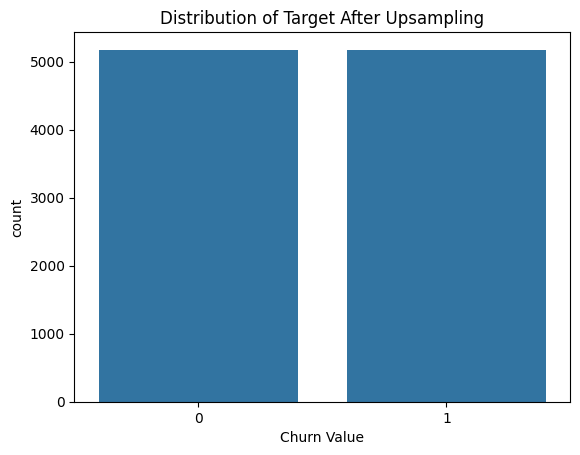

In [53]:
# Combining the upsampled data
final_df = pd.concat([churned_upsampled, not_churned])
sns.countplot(x = "Churn Value", data = final_df)
plt.title("Distribution of Target After Upsampling")

# Model Building and Model Selection
1. Logistic Regression
2. Decision Tree

In [54]:
# Explaintory vars
X = final_df.drop('Churn Value', axis = 1)

# Target var
Y = final_df['Churn Value']

In [55]:
# Separating the dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size = 0.2,
                                                    random_state = 1)

## 1. LogisticRegression Model

In [56]:
Logi_model = LogisticRegression(max_iter = 500)

In [57]:
Logi_model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [58]:
# Accuracy score on training data
logi_train_pred = Logi_model.predict(X_train)
logi_acc_train = accuracy_score(logi_train_pred, Y_train)
print("Accuracy score on trianing data:",logi_acc_train)

# Accurcy on test data
logi_test_pred = Logi_model.predict(X_test)
logi_acc_test = accuracy_score(logi_test_pred, Y_test)
print("Accuracy score on test data:",logi_acc_test)

Accuracy score on trianing data: 0.9115728436820488
Accuracy score on test data: 0.9096618357487922


The accuracy score is quite high, which is great. Additionally, the accuracy scores for both training and test data are very similar, indicating that our model is not overfitting.

Now, let's examine the precision and recall scores:

In [59]:
logi_recall = recall_score(Y_test,logi_test_pred)
logi_precision = precision_score(Y_test, logi_test_pred)
print("LogisticRegression model's metrics:\n")
print("Accuracy on Training Data:", round(logi_acc_train, 2))
print("Accuracy on Test Data:", round(logi_acc_test,2))
print("Recall Score:", round(logi_recall,2))
print("Precision Score:", round(logi_precision,2))

LogisticRegression model's metrics:

Accuracy on Training Data: 0.91
Accuracy on Test Data: 0.91
Recall Score: 0.92
Precision Score: 0.91


### Confusion Matrix (Logistic Regression)

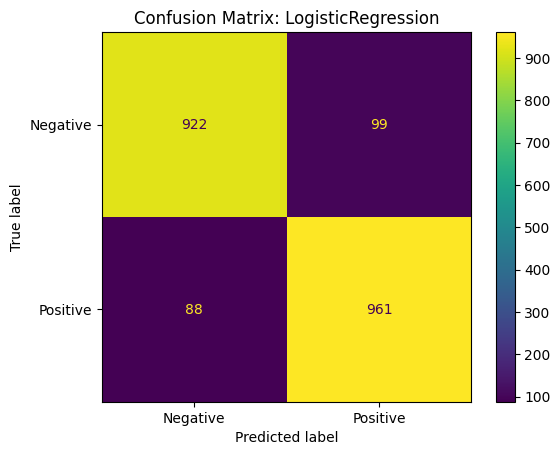

In [60]:
confusion_matrix = metrics.confusion_matrix(Y_test, logi_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: LogisticRegression')
plt.show()

Lets see if XGBClassifier can deliver a better result:

## 2. Decision Tree Classifier

In [61]:
# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [62]:
# Train the model
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
# Accuracy score on training data
dec_tree_train_pred = clf.predict(X_train)
dec_tree_acc_train = accuracy_score(dec_tree_train_pred, Y_train)
print("Accuracy score on training data:",dec_tree_acc_train)

# Accurcy on test data
dec_tree_test_pred = clf.predict(X_test)
dec_tree_acc_test = accuracy_score(dec_tree_test_pred, Y_test)
print("Accuracy score on test data:",dec_tree_acc_test)

Accuracy score on training data: 1.0
Accuracy score on test data: 0.9599033816425121


In [64]:
# Recall and Precision Score
dec_tree_recall = recall_score(Y_test,dec_tree_test_pred)
dec_tree_precision = precision_score(Y_test, dec_tree_test_pred)
print("Decision Tree model's metrics:\n")
print("Accuracy on Training Data:", round(dec_tree_acc_train, 2))
print("Accuracy on Test Data:", round(dec_tree_acc_test,2))
print("Recall Score:", round(dec_tree_recall,2))
print("Precision Score:", round(dec_tree_precision,2))

Decision Tree model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.96
Recall Score: 0.98
Precision Score: 0.95


### Confusion Matrix (Decision Tree)

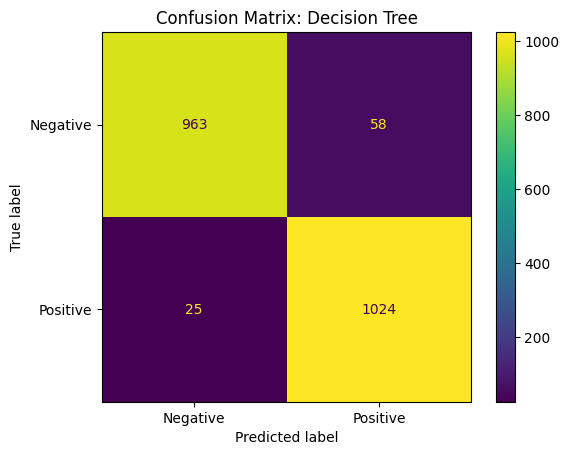

In [65]:
confusion_matrix = metrics.confusion_matrix(Y_test, dec_tree_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Decision Tree')
plt.show()

# Conclusion:

## Logistic Regression vs. Decision Tree for Telecom Churn Prediction

In this analysis, we compared the performance of Logistic Regression and Decision Tree models on a Telecom churn dataset. Here are the key findings:

1. **Accuracy**:
   - Logistic Regression achieved an accuracy of 91% on both the training and test datasets, indicating good generalization.
   - Decision Tree exhibited slightly higher accuracy, achieving a perfect score of 100% on the training data and 96% on the test data. This suggests that Decision Tree might be overfitting the training data to some extent, as indicated by the drop in accuracy on the test data compared to the training data.

2. **Recall Score**:
   - Logistic Regression demonstrated a recall score of 92%, indicating that it correctly identified 92% of the churn cases.
   - Decision Tree outperformed Logistic Regression in terms of recall, achieving a score of 98%. This suggests that Decision Tree is better at identifying churn instances, which is crucial for a telecom company to retain customers.

3. **Precision Score**:
   - Both models displayed high precision scores, with Logistic Regression at 91% and Decision Tree at 95%. This indicates that the majority of instances classified as churn by both models were indeed churn cases.

## Interpretation:

- **Logistic Regression**:
  - Despite slightly lower accuracy compared to Decision Tree, Logistic Regression demonstrates consistent performance across both training and test datasets. It may be preferred in scenarios where model interpretability is crucial, as it provides coefficients for each feature, making it easier to interpret the impact of predictors on the outcome.
  - However, it might not capture complex relationships between features as effectively as Decision Tree.

- **Decision Tree**:
  - While Decision Tree achieved higher accuracy on the training data, its performance slightly dropped on the test data, indicating potential overfitting. Regularization techniques or ensemble methods could be employed to mitigate overfitting.
  - Decision Tree excels in capturing complex interactions between features, as evident from its higher recall and precision scores. However, it might be less interpretable compared to Logistic Regression due to its tree-like structure.

## Recommendation:

- Based on the analysis, the choice between Logistic Regression and Decision Tree depends on the specific requirements of the telecom company:
  - If the primary goal is to accurately identify churn cases while maintaining interpretability, Logistic Regression could be the preferred choice.
  - However, if capturing complex patterns in the data is critical and interpretability is less of a concern, Decision Tree could offer better performance.
  - Ensemble methods such as Random Forest or Gradient Boosting could also be explored to further enhance predictive performance while maintaining interpretability.
